In [2]:
from torchdiffeq import odeint
import models_and_functions as MyModels
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
df_antibiotics, antibiotic_types, df_relative_abundances= MyModels.wrangle_data()
df_relative_abundances = df_relative_abundances.drop_duplicates(subset = ['PatientID', 'DayRelativeToNearestHCT'])
node_model_test_df = pd.read_csv('node_model_test_df.csv', index_col = 0)
node_model = torch.load('node_model.pth', weights_only=False)
glv_model = torch.load('glv_model.pth', weights_only=False)
glv_model_test_df = pd.read_csv('glv_model_test_df.csv')  # note that this is a subset of the NODE test df
node_model_trained_on_glv_data_test_df = pd.read_csv('node_model_trained_on_glv_data_test_df.csv', index_col = 0)
node_model_trained_on_glv_data = torch.load('node_model_trained_on_glv_data.pth', weights_only=False)

colors = ['#D0D0D0',
            '#F88379',
            '#006400',
            '#16DDD3',
            '#AD998C',
            '#D0D0D0',
            '#AA336A',
            '#FBA22E',
            '#D0D0D0',
            '#EE2C2C',
            '#D0D0D0',
            '#CA0BE8',
            '#808080']
classes = ["Actinobacteria",
    "Alphaproteobacteria",
    "Bacilli",
    "Bacteroidia",
    "Clostridia",
    "Coriobacteriia",
    "Deltaproteobacteria",
    "Erysipelotrichia",
    "Fusobacteriia",
    "Gammaproteobacteria",
    "Negativicutes",
    "Verrucomicrobiae",
    "<removed_taxa>"]


# Compare Test Loss for Dynamical Prediction 7 Days In advance between models

## Here is a comparison between GLV test loss and NODE test loss for a NODE model that was trained on exactly the same samples as the GLV model, computed on the same test data.

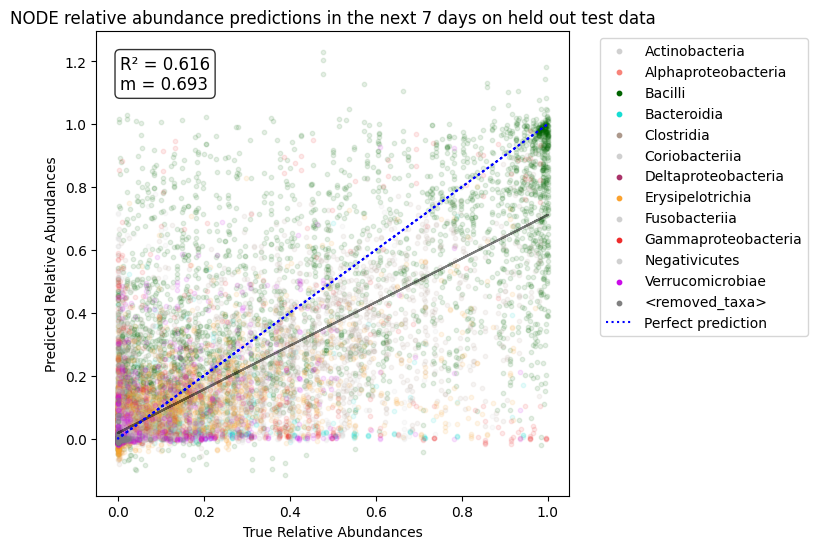

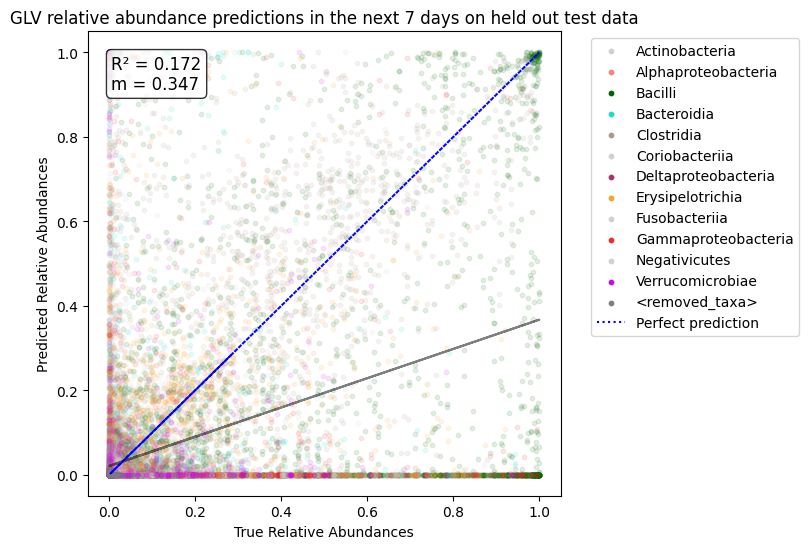

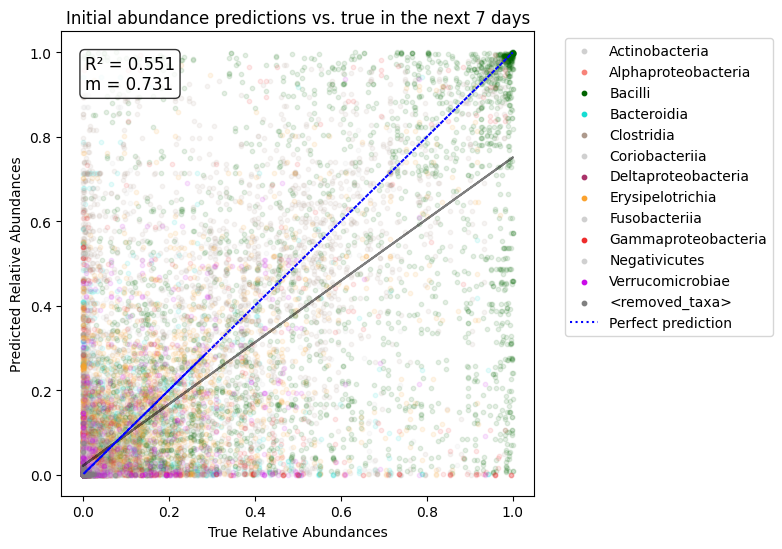

np.float64(0.550932163172528)

In [3]:
# NODE model
MyModels.compute_scatter_and_r2(node_model_trained_on_glv_data, node_model_trained_on_glv_data_test_df, plot=True, save_eps = True)
# GLV model
MyModels.compute_scatter_and_r2_absolute_abundance_model(glv_model, glv_model_test_df, plot=True,save_eps = True)
# Baseline Prediction
MyModels.compute_baseline_scatter_and_r2(node_model_trained_on_glv_data_test_df, plot=True, save_eps = True)


## Comparison between NODE trained on all the data available vs. Baseline prediction

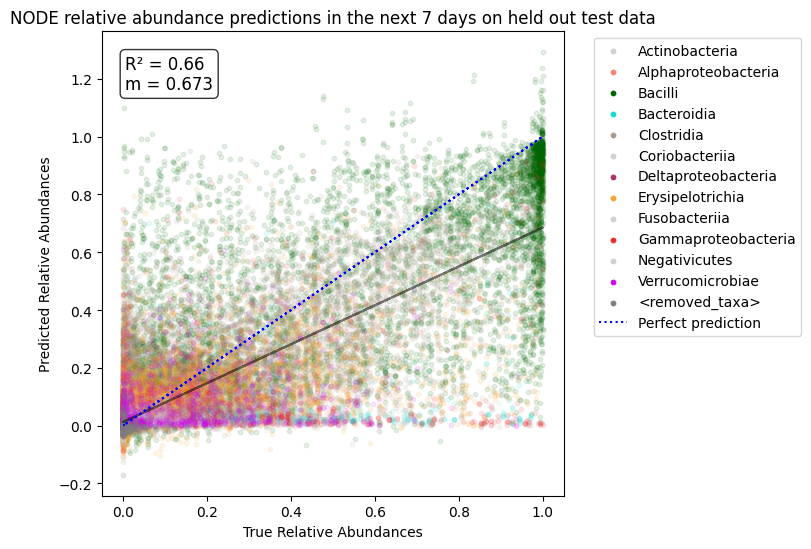

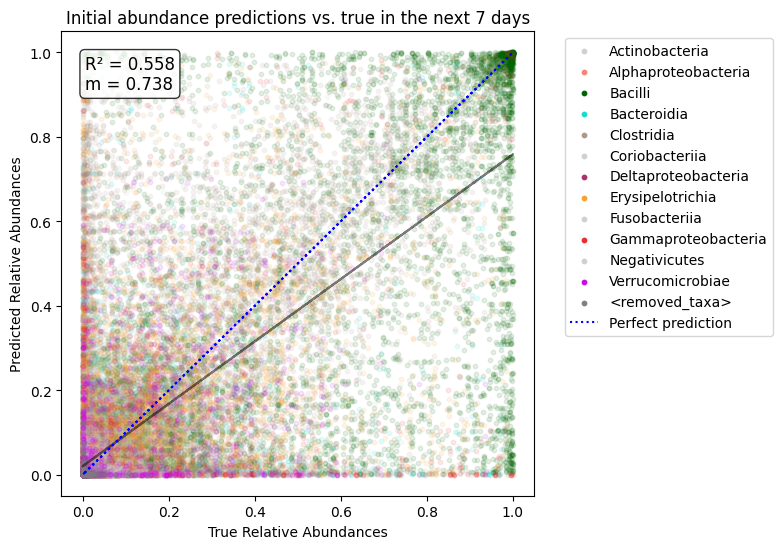

np.float64(0.5582797112409346)

In [4]:
# NODE model
MyModels.compute_scatter_and_r2(node_model, node_model_test_df, plot=True, save_eps = True)
# Baseline Prediction
MyModels.compute_baseline_scatter_and_r2(node_model_test_df, plot=True, save_eps = True)


# Test R^2 of models varying the prediction size

### First compare node, glv and baseline all on the same training and test data:

In [8]:
days = list(range(1,21, 2)) + list(range(21,100, 5))
constant_rsquares = []
node_rsquares = []
glv_rsquares = []
for day in days:
    r_squared_constant_model = MyModels.compute_baseline_scatter_and_r2(node_model_trained_on_glv_data_test_df, prediction_size = day, plot = False)
    r_squared_node = MyModels.compute_scatter_and_r2(node_model_trained_on_glv_data, node_model_trained_on_glv_data_test_df, prediction_size = day, plot = False)
    r_squared_glv = MyModels.compute_scatter_and_r2_absolute_abundance_model(glv_model, glv_model_test_df,prediction_size = day, plot = False)
    constant_rsquares.append(r_squared_constant_model)
    node_rsquares.append(r_squared_node)
    glv_rsquares.append(r_squared_glv)
    print(day)


1
3
5
7


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


9


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


11


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


13


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


15


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


17


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


19


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


21


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


26


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


31


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


36


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


41


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


46


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


51


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


56


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


61


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


66


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


71


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


76


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


81


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


86


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


91
96


/data1/xavierj/isaac/Neural_ODEs_Paper_Code_2/Clinical_Data_Experiments/models_and_functions.py:682: RuntimeWarning: invalid value encountered in divide
  predictions_np = predictions_np / pred_sums


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


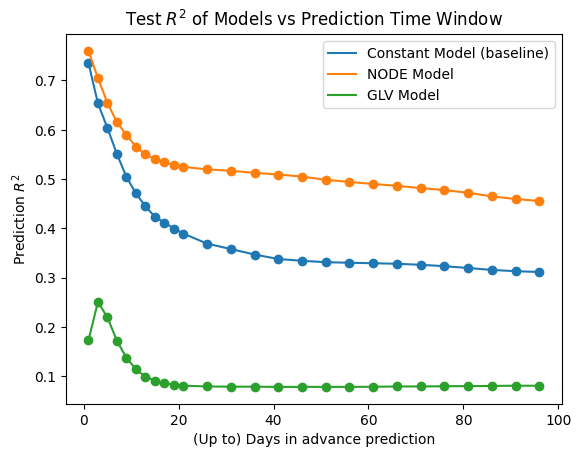

In [9]:

plt.plot(days, constant_rsquares, label = 'Constant Model (baseline)')
plt.plot(days, node_rsquares, label = 'NODE Model')
plt.plot(days, glv_rsquares, label = 'GLV Model')
plt.scatter(days, constant_rsquares)
plt.scatter(days, node_rsquares)
plt.scatter(days, glv_rsquares)
plt.title('Test $R^{2}$ of Models vs Prediction Time Window')
plt.xlabel('(Up to) Days in advance prediction')
plt.ylabel('Prediction $R^2$')
plt.legend()
plt.savefig(
    "test_R_squared_vs_days_in_advance_prediction_node_vs_glv_vs_baseline.eps",
    format="eps",
    bbox_inches="tight",
    pad_inches=0.1  
)

### Now compare node with baseline on the full data:

In [10]:
days = list(range(1,21, 2)) + list(range(21,100, 5))
constant_rsquares = []
node_rsquares = []
for day in days:
    r_squared_constant_model = MyModels.compute_baseline_scatter_and_r2(node_model_test_df, prediction_size = day, plot = False)
    r_squared_node = MyModels.compute_scatter_and_r2(node_model, node_model_test_df, prediction_size = day, plot = False)
    constant_rsquares.append(r_squared_constant_model)
    node_rsquares.append(r_squared_node)
    print(day)



1
3
5
7
9
11
13
15
17
19
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


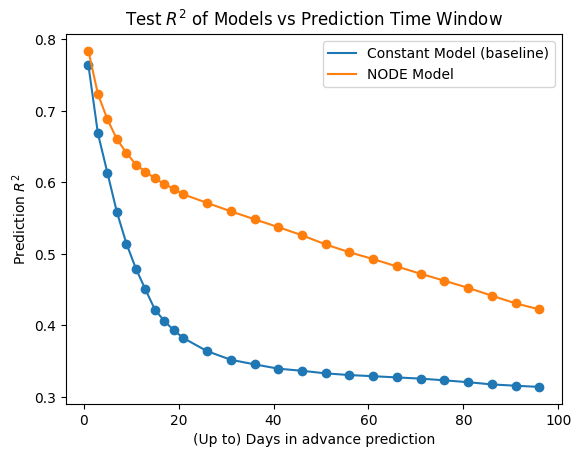

In [11]:

plt.plot(days, constant_rsquares, label = 'Constant Model (baseline)')
plt.plot(days, node_rsquares, label = 'NODE Model')
plt.scatter(days, constant_rsquares)
plt.scatter(days, node_rsquares)
plt.title('Test $R^{2}$ of Models vs Prediction Time Window ')
plt.xlabel('(Up to) Days in advance prediction')
plt.ylabel('Prediction $R^2$')
plt.legend()
plt.savefig(
    "test_R_squared_vs_days_in_advance_prediction_node_vs_baseline.eps",
    format="eps",
    bbox_inches="tight",
    pad_inches=0.1  
)

# Make Prediction vs. True Timeline Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


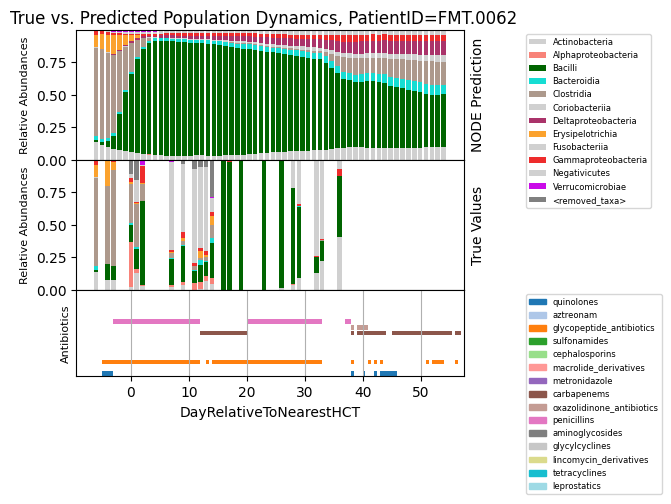

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


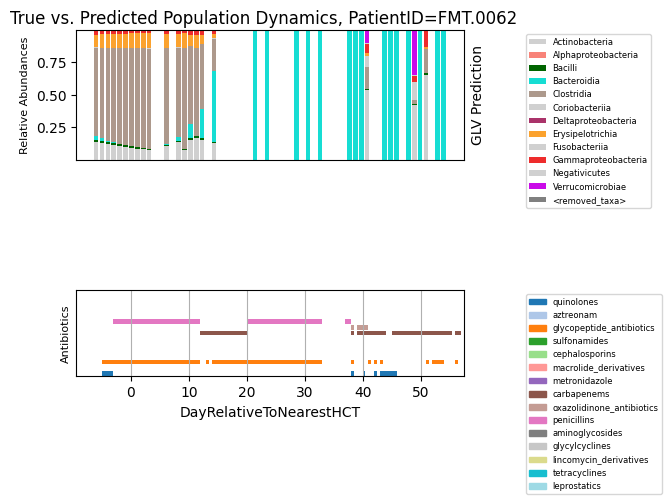

In [5]:
def make_prediction_plot_without_reseting(model, patient_id, x0_sample_id, test_df, df_antibiotics, antibiotic_types,  file_title,
                                          fig_size=(5,2), prediction_size = 7,
                                          glv_model = False, title = 'NODE Prediction', time_range=None):
    patient_id_df = test_df[test_df['PatientID'] == patient_id]
    sample_id_df = patient_id_df[patient_id_df['SampleID']==x0_sample_id]
    x0 = torch.from_numpy(sample_id_df.iloc[:, :-3].to_numpy()).to(device, torch.float32).squeeze(0)
    t0 = torch.from_numpy(sample_id_df['DayRelativeToNearestHCT'].to_numpy()).to(device, torch.float32)
    tf = t0+prediction_size
    t_preds = torch.linspace(t0.item(), tf.item(), int(tf-t0)).to(device)
    
    # Get ground truth data for this patient
    t_true = torch.from_numpy(patient_id_df['DayRelativeToNearestHCT'].to_numpy()).to(device, torch.float32)
    x_true = torch.from_numpy(patient_id_df.iloc[:, :-3].to_numpy()).to(device, torch.float32)
    
    if glv_model: # needed to add this line because the glv uses float64
        x0 = x0.to(dtype = torch.float64)
    model.patient_id = patient_id
    x_preds = odeint(model, x0, t_preds)
    
    def plot_stacked_bar_normalized(x_preds, t_preds, x_true, t_true, colors, time_range=None, title = title):
        # Process predictions
        x_pred_np = x_preds.cpu().detach().numpy()
        t_pred_np = t_preds.cpu().detach().numpy()
        x_pred_np[x_pred_np < 0] = 0
        row_sums_pred = x_pred_np.sum(1, keepdims=True)
        x_pred_normalized = np.zeros_like(x_pred_np)
        np.divide(x_pred_np, row_sums_pred, out=x_pred_normalized, where=row_sums_pred != 0)
        
        # Process ground truth
        x_true_np = x_true.cpu().detach().numpy()
        t_true_np = t_true.cpu().detach().numpy()
        x_true_np[x_true_np < 0] = 0
        row_sums_true = x_true_np.sum(1, keepdims=True)
        x_true_normalized = np.zeros_like(x_true_np)
        np.divide(x_true_np, row_sums_true, out=x_true_normalized, where=row_sums_true != 0)
        
        # Apply time range filter
        if time_range is not None:
            start, end = time_range
            # Filter predictions
            mask_pred = (t_pred_np >= start) & (t_pred_np <= end)
            t_pred_np = t_pred_np[mask_pred]
            x_pred_normalized = x_pred_normalized[mask_pred, :]
            # Filter ground truth
            mask_true = (t_true_np >= start) & (t_true_np <= end)
            t_true_np = t_true_np[mask_true]
            x_true_normalized = x_true_normalized[mask_true, :]
            
        # Filter antibiotic data for this patient and time range
        patient_antibiotics = df_antibiotics[df_antibiotics['PatientID'] == patient_id].copy()
        if time_range is not None:
            start, end = time_range
            # Keep antibiotics that overlap with the time range
            patient_antibiotics = patient_antibiotics[
                (patient_antibiotics['StopDayRelativeToNearestHCT'] >= start) & 
                (patient_antibiotics['StartDayRelativeToNearestHCT'] <= end)
            ]
            
        # Create figure with subplots - no space between plots
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(fig_size[0], fig_size[1] + 2.5), 
                                           gridspec_kw={'height_ratios': [3, 3, 2], 'hspace': 0})
        
        fig.suptitle(f'True vs. Predicted Population Dynamics, PatientID={patient_id}', y=0.925)
        # Predictions plot
        bottom_pred = np.zeros_like(t_pred_np)
        for i in range(13):
            ax1.bar(t_pred_np, x_pred_normalized[:,i], bottom=bottom_pred, color=colors[i])
            bottom_pred += x_pred_normalized[:,i]
        ax1.legend([f'{classes[i]}' for i in range(13)], bbox_to_anchor=(1.15,1), fontsize = 6)
        ax1.set_ylabel('Relative Abundances', fontsize = 8)
        # Move title to the right side
        ax1.text(1.02, 0.5, title, transform=ax1.transAxes, 
                rotation=90, verticalalignment='center', fontsize=10)
        # Remove x-axis labels and ticks for top plot
        ax1.set_xticklabels([])
        ax1.tick_params(axis='x', which='both', bottom=False)
        
        # Ground truth plot
        if not glv_model and len(t_true_np) > 0:  # Only plot if we have ground truth data
            bottom_true = np.zeros_like(t_true_np)
            for i in range(13):
                ax2.bar(t_true_np, x_true_normalized[:,i], bottom=bottom_true, color=colors[i])
                bottom_true += x_true_normalized[:,i]
            ax2.set_ylabel('Relative Abundances', fontsize = 8)
            # Move title to the right side
            ax2.text(1.02, 0.5, f'True Values', 
                    transform=ax2.transAxes, rotation=90, verticalalignment='center', fontsize=10)
            ax2.set_xlim(ax1.get_xlim())  # Match x-axis range with predictions plot
            # Remove x-axis labels and ticks for middle plot
            ax2.set_xticklabels([])
            ax2.tick_params(axis='x', which='both', bottom=False)
        else:
            ax2.set_visible(False)  # Hide the ground truth subplot if no data
            
        # Antibiotic treatment bars
        ax3.set_xlim(ax1.get_xlim())  # Match x-axis range with main plot
        ax3.set_ylim(-0.5, len(antibiotic_types) - 0.5)
        
        # Create color map for antibiotics
        antibiotic_colors = plt.cm.tab20(np.linspace(0, 1, len(antibiotic_types)))
        antibiotic_color_map = {antibiotic: antibiotic_colors[i] for i, antibiotic in enumerate(antibiotic_types)}
        
        # Plot antibiotic bars and collect handles for legend
        antibiotic_handles = []
        for _, row in patient_antibiotics.iterrows():
            antibiotic = row['Category']
            start_day = row['StartDayRelativeToNearestHCT']
            stop_day = row['StopDayRelativeToNearestHCT']
            
            if antibiotic in antibiotic_types:
                y_pos = antibiotic_types.index(antibiotic)
                width = stop_day - start_day if stop_day != start_day else 0.5  # Minimum width for single-day treatments
                bar = ax3.barh(y_pos, width, left=start_day, height=0.8, 
                              color=antibiotic_color_map[antibiotic], alpha=1, 
                              label=antibiotic)
                
        # Create legend handles for all antibiotics (even if not present in this patient)
        for antibiotic in antibiotic_types:
            antibiotic_handles.append(plt.Rectangle((0,0),1,1, color=antibiotic_color_map[antibiotic], 
                                                   alpha=1, label=antibiotic))
        
        # Customize antibiotic subplot
        ax3.set_yticks([])  # Remove y-axis ticks and labels
        ax3.set_xlabel('DayRelativeToNearestHCT')
        ax3.set_ylabel('Antibiotics', fontsize=8)
        # Move antibiotic section title to the right side
        # ax3.text(1.02, 0.5, 'Antibiotics', transform=ax3.transAxes, 
        #         rotation=90, verticalalignment='center', fontsize=12)
        ax3.grid(True, alpha=1)
        
        # Add antibiotic legend
        ax3.legend(handles=antibiotic_handles, bbox_to_anchor=(1.15, 1), 
                  loc='upper left', fontsize=6)
        plt.savefig(f'./eps_figures/model_predictions_patientID={patient_id}_{file_title}.eps', format="eps", bbox_inches='tight')
        plt.show()
        
    plot_stacked_bar_normalized(x_preds, t_preds, x_true, t_true, colors, time_range=time_range, title = title)


patient_id = 'FMT.0062'
x0_sample_id = patient_id+'B'
prediction_size = 60
make_prediction_plot_without_reseting(node_model,patient_id,x0_sample_id,  node_model_test_df,df_antibiotics, antibiotic_types, 'node', prediction_size=prediction_size) 
make_prediction_plot_without_reseting(glv_model,patient_id,x0_sample_id,  glv_model_test_df,df_antibiotics, antibiotic_types, 'glv', title = 'GLV Prediction', glv_model= True,prediction_size=prediction_size)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


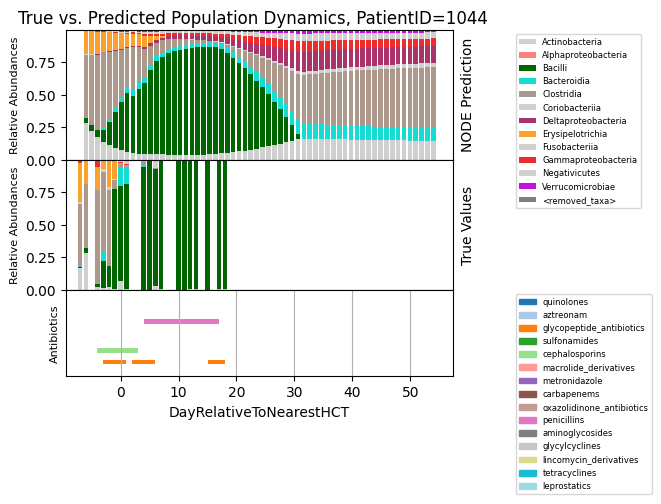

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


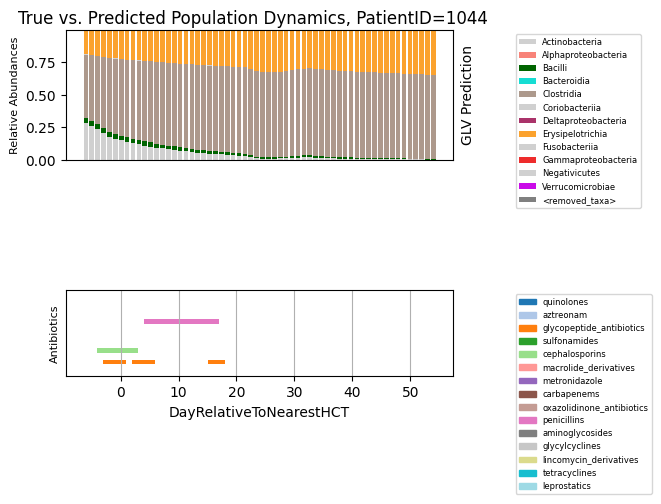

In [6]:
patient_id = '1044'
x0_sample_id = patient_id+'B'
prediction_size = 60
make_prediction_plot_without_reseting(node_model,patient_id,x0_sample_id,  node_model_test_df,df_antibiotics, antibiotic_types, 'node', prediction_size=prediction_size) 
make_prediction_plot_without_reseting(glv_model,patient_id,x0_sample_id,  glv_model_test_df,df_antibiotics, antibiotic_types, 'glv', title = 'GLV Prediction', glv_model= True,prediction_size=prediction_size)
